# Bechdel Test Data Analysis

The aim of this project will be to predict a movie's Bechdel Test verdict based on information like rating, genre, budget, cast, etc. 

The Bechdel Test: A test consisting of 3 criteria that build on eachother, meant to test if a movie has a certain level of female representation. To pass the Bechdel Test, a movie must...
1. Have at least 2 named female characters
2. The female characters must have a conversation with each other
3. They must talk about something other than men
If you want to know more about the Bechdel Test, you can find out more here https://en.wikipedia.org/wiki/Bechdel_test

The data that I started with for this project came from https://github.com/fivethirtyeight/data/tree/master/bechdel, Fivethirtyeight's github page. The following article uses this data set to show how movies which pass the Bechdel Test tend to do better in the box office. http://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/ I aim to build upon this data and discover new trends.

First, here are a few charts based on the original data set.

# I: Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bechdel_data_min.csv")
df.head()

,year,imdb,title,clean_test,binary,genre,age_rating,budget_2013$,star_rating,creator,director,cast,writer
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,comedy,R,13000000,NaN,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok,PASS,scifi,R,45658735,NaN,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,drama,R,20000000,NaN,NaN,NaN,NaN,NaN
3,2013,tt1272878,2 Guns,notalk,FAIL,action,R,61000000,NaN,NaN,NaN,NaN,NaN
4,2013,tt0453562,42,men,FAIL,drama,PG13,40000000,NaN,NaN,NaN,NaN,NaN


Here you can actually see some columns I added in later. The columns that are not filled with NaN's are the originals. 

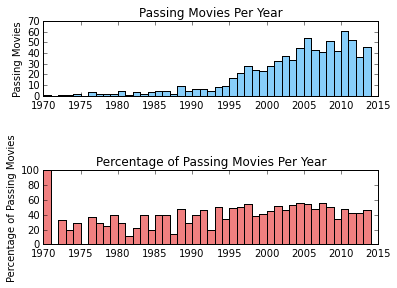

In [2]:
# making a chart of number of passing movies per year

passed_per_year = []

for i in xrange(1970, 2014):
    passed = len(df[(df.binary == "PASS") & (df.year == i)])
    passed_per_year.append([i, (passed)])
    
df_ppy = pd.DataFrame(passed_per_year, columns = ['year', 'passing'])

# making a chart of percentage of passing movies per year

passed_vs_total = []

for i in xrange(1970, 2014):
    passed = len(df[(df.binary == "PASS") & (df.year == i)])
    total = len(df[df.year == i])
    passed_vs_total.append([i, (passed/float(total))*100])
    
df_pvt = pd.DataFrame(passed_vs_total, columns = ['year', 'p_passing'])

plt.subplot(2, 1, 1)
plt.bar(df_ppy.year, df_ppy.passing,1, color='lightskyblue')
plt.ylabel('Passing Movies')
plt.title('Passing Movies Per Year')

plt.subplot(2, 1, 2)
plt.bar(df_pvt.year, df_pvt.p_passing,1, color='lightcoral')
plt.ylabel('Percentage of Passing Movies')
plt.title('Percentage of Passing Movies Per Year')
plt.subplots_adjust(hspace=1)

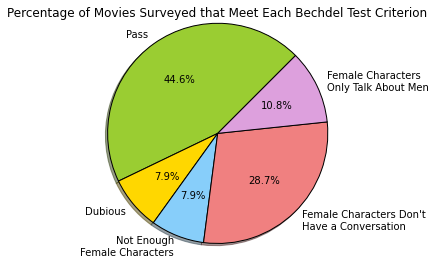

In [3]:
# percent of total movies surveyed that totally pass, fail different parts

length = len(df)
categories = ["ok", "dubious", "nowomen", "notalk", "men"]
criterion_ps = []
for category in categories:
    criterion_ps.append((len(df[df.clean_test == category]))/float(length))


cats = ["Pass", "Dubious", "Not Enough \nFemale Characters", "Female Characters Don't \nHave a Conversation", "Female Characters \nOnly Talk About Men"]
plt.pie(criterion_ps, explode=None, labels = cats,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=45, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Percentage of Movies Surveyed that Meet Each Bechdel Test Criterion')


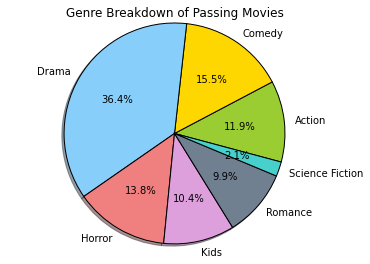

In [4]:
# of movies that passed, what percents of each genre

passed_total = len(df[df.binary == "PASS"])
genres = ["action","comedy","drama","horror","kids","romance","scifi"]
genre_ps = []
for genre in genres:
    genre_ps.append((len(df[(df.binary == "PASS") & (df.genre == genre )]))/float(passed_total))

cats = ["Action","Comedy","Drama","Horror","Kids","Romance","Science Fiction"]
plt.pie(genre_ps, explode=None, labels = cats,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum', 'slategray','mediumturquoise'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=-15, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Genre Breakdown of Passing Movies')

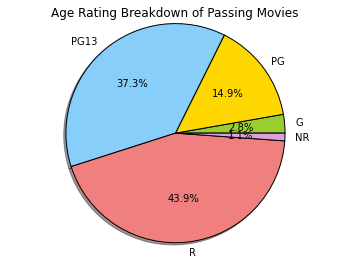

In [5]:
# of movies that passed, what age rating of each movie

ratings = ["G","PG","PG13","R","NR"]
rating_ps = []
for rating in ratings:
    rating_ps.append((len(df[(df.binary == "PASS") & (df.age_rating == rating )]))/float(passed_total))

plt.pie(rating_ps, explode=None, labels = ratings,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=None, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Age Rating Breakdown of Passing Movies')

These are just some preliminary charts, there will be more to come once I add in more data. 

# II: Aquiring More Data

To fill out the data more and make my analysis different from the previously mentioned article, I decided to add in imdb's star_rating, director, cast, and writers. The following is how I got that data, and then put it into a format which I could process

In [8]:
from imdb import IMDb
im = IMDb()

#just a little test to show imdbpy works
id = df.iloc[4][1] # snagging the movie id for the movie "42"
real_id = int(id[2:]) # converting to an int
movie = im.get_movie(real_id) #getting the movie object from imdbpy
df.loc[4, 'star_rating'] = movie['rating']# setting the cell
df.head()

,year,imdb,title,clean_test,binary,genre,age_rating,budget_2013$,star_rating,creator,director,cast,writer
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,comedy,R,13000000,NaN,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok,PASS,scifi,R,45658735,NaN,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,drama,R,20000000,NaN,NaN,NaN,NaN,NaN
3,2013,tt1272878,2 Guns,notalk,FAIL,action,R,61000000,NaN,NaN,NaN,NaN,NaN
4,2013,tt0453562,42,men,FAIL,drama,PG13,40000000,7.5,NaN,NaN,NaN,NaN


When you lookup a movie on imdbpy, you get back a movie object, which holds information about the movie like star_rating and such. Here you can see in row: 4, column: star rating, the star rating has been changed to 7.5.

So the code that follows is commented out because it takes a very long time to run. This was one struggle I faced when getting the imdb data. Either I could get all the data in a file and then find a way to parse it into a dataframe myself, or use imdbpy which did that easily for me but took a long time. I went the imdbpy route.

In [9]:
#movies = dict()
#for i in range (len(df)):
    #id = df.iloc[i][1]
    #real_id = int(id[2:])
    #movie = im.get_movie(real_id)
    #movies[real_id] = movie
    
#def add_zeros(id_number):
#    str_id = str(id_number)  
#    while len(str_id) < 7: 
#        str_id = '0' + str_id     
#    return str_id

#def arr_to_string(thing):
#    new = []
#    for i in thing:
#        new.append(str(i))
#    return str(new)

#for movie_id in movies:
#    real_movie = movies[movie_id]   
#    df_id = 'tt' + add_zeros(movie_id) 
#    if len(df[df.imdb == df_id].index.values) == 0:
#        continue
#    i = df[df.imdb == df_id].index.values[0]
#    df.ix[i, 'star_rating'] = real_movie.get('rating')   
#    df.ix[i, 'director'] = real_movie['directed by'][0]  
#    df.ix[i, 'cast'] = arr_to_string(real_movie['actors'][:5])
#    #df.ix[i, 'writer'] = arr_to_string(real_movie.get('writer'))
#    df.ix[i, 'genre'] = real_movie['genre'][0]

#df.to_csv('complete_movies.csv')

Once I had taken the time to get all the data, I needed a way to put it somewhere so I could process it later. This is why this part is a little bit messy. 

The add_zeros function is necessary because in taking a string id, for example 'tt0021425', by making then taking [2:] of it, or '0021425', and then turning that into an int, we are left with 21425. This can be used to look up movies on imdbpy, but when we try to simply add back the 'tt' to look it up in our original dataframe, we get 'tt21425'.

The arr_to_string function deals with a problem that I did not realize the root of until later. Dataframes are not great at holding arrays. Thus my messy way around it here was just to take the names of the writers and actors from the writer and actor objects and put them into a string which I'll later convert back into an array. 

# III: Prepping All the Data for Analysis

So for the analysis phase of this project I'll be using a Decision Tree. Thus I must convert all of the data in each column into numbers. Categorizing the splits is not so straightforward for each label.

years - split into 5 year periods

ids, clean_test and titles - keep, but don't analyze

binary, genre, rating, and director - use sci-kit's LabelEncoder()

budgets - these turned out to be too big, so i interpreted them in the 1000s instead.

star_ratings - make integer cutoffs

cast - going to have to do something special

writer - use the same technique as for cast

In [10]:
import math
import string
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

df = pd.read_csv("complete_movies.csv")

In [11]:
#making clean_test, binary, genre, age_rating, and director into ints

lab = preprocessing.LabelEncoder()
categoricals = ['clean_test','binary','genre','age_rating','director']
for categorical in categoricals: df[categorical] = lab.fit_transform(df[categorical])

/Users/BREA/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [12]:
#making star_ratings into ints

for i in range (len(df)):
    star = df.ix[i,8]
    if not math.isnan(star):
        id = int(star)
        df.ix[i, 8] = id
    else:
        df.ix[i, 8] = -1

In [13]:
#puts years into year ranges

for i in range (len(df)):
    year = df.ix[i,0]
    #gets decade
    new_year = (year % 100) - (year % 10)
    #rounds new_year to the nearest half decade
    if year%10 >= 5:
        new_year += 5
    df.ix[i,0] = new_year

In [16]:
# making actor/writer strings back into arrays of actors/writers

def string_to_arr(thing):
    thing = string.replace(thing,"'", "")
    thing = string.replace(thing,"[","")
    thing = string.replace(thing,"]","")
    new = string.split(thing, ',')
    return new

#first set all the nans to ""

df.cast.fillna("", inplace=True)
df.writer.fillna("", inplace=True)

# because I can't store these in the dataframe, they go in their own array

actor_array = []
writer_array = [] 
for i in range (len(df)):
    actor_array.append(string_to_arr(df.ix[i,10]))
    writer_array.append(string_to_arr(df.ix[i,11]))


Next I tackled how to tell how influential an actor or writer might be in the passing of a movie. I made a dictionary with actors as keys, and an array of 1s and 0s as values. Each 1 represents a passing movie the actor has appeared in, while each 0 represents a fail. Then I can easily check for any given actor what percentage of their movies has passed the test. Similarly for the writers.

In [17]:
def make_into_dict(arr, df):
    dictionary = {}
    for i in range(len(arr)):
        #verdict is 1 for pass, 0 for fail 
        verdict = df.ix[i,4]
        #gets the cast list for movie index i 
        people = arr[i]
        for person in people:
            #puts a person in the dictionary and/or adds their passing/failing movie
            if person in dictionary:
                dictionary[person].append(verdict)
            else:
                dictionary[person] = [verdict]
    return dictionary

# Making the actual dictionaries for actors and writers

actor_pass_dict = make_into_dict(actor_array, df)
writer_pass_dict = make_into_dict(writer_array, df)

In [18]:
# Dividing the budget_2013$ by 1000 so it can fit into int32 format

for i in range (len(df)):
    budget = df.ix[i,7]
    if not math.isnan(budget):
        df.ix[i,7] = budget/1000
    else:
        df.ix[i,7] = 10

In [19]:
#Checking to make sure all NaN's are filled

df.isnull().any()

year            False
imdb            False
title           False
clean_test      False
binary          False
genre           False
age_rating      False
budget_2013$    False
star_rating     False
director        False
cast            False
writer          False
dtype: bool

# IV: The Analysis

In [23]:
df_new = df.drop(['imdb','title','clean_test','cast','writer'], axis = 1)
feature_cols = df_new.drop(['binary'], axis = 1).columns 
#all but the imdb, title, binary, cast, writer columns
X = df_new[feature_cols] # have to add in the other columns from arrays
y = df_new.binary

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(compute_importances=None, criterion='mse',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           random_state=1, splitter='best')

In [25]:
preds = treereg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))

treereg = DecisionTreeRegressor(max_depth=14, random_state=4)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.17490199818662697

In [26]:
# 14 seemed the best depth

treereg = DecisionTreeRegressor(max_depth=14, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(compute_importances=None, criterion='mse', max_depth=14,
           max_features=None, max_leaf_nodes=None, min_density=None,
           min_samples_leaf=1, min_samples_split=2, random_state=1,
           splitter='best')

In [27]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.007426
1,genre,0.004572
2,age_rating,0.933641
3,budget_2013$,0.026643
4,star_rating,0.011545
5,director,0.016174


Seems like age_rating, budget, director, and star_rating matter more. Now to make the decision tree!



In [28]:
!ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
!brew install libtool
!brew install graphviz

It appears Homebrew is already installed. If your intent is to reinstall you
should do the following before running this installer again:
    rm -rf /usr/local/Cellar /usr/local/.git && brew cleanup


In [29]:
from sklearn.tree import export_graphviz
with open("bechdel.dot", 'wb') as f:
    f = export_graphviz(treereg, out_file=f, feature_names=feature_cols)


And thus the decision tree! In the next phases of this project, I plan to actually test the decision tree with some new movies, and find a way to use the data gathered about the cast and writers effectively. The decision tree is just not a great way to utilize this information, but in the future I may analyze these separately with a different method, or simply represent the data I have from them (like actor with the highest passing percentage, etc.) in chart form. 

# V: More Charts

Now that I have more information, here are a few more charts that show some different and interesting things about the data. 

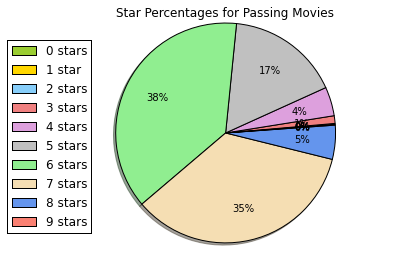

In [32]:
df = pd.read_csv("complete_movies.csv")

# making a chart for imdb star percentages for passing movies

for i in range (len(df)):
    thing = df.ix[i,8]
    if not math.isnan(thing):
        id = int(thing)
        df.ix[i, 8] = id

passing = df[df.binary == "PASS"]
categories = [0,1,2,3,4,5,6,7,8,9]
criterion_ps = []
for category in categories:
    criterion_ps.append(len(passing[passing.star_rating == category])/float(len(passing)))

cats = ["0 stars", "1 star", "2 stars", "3 stars", "4 stars", "5 stars", "6 stars", "7 stars", "8 stars", "9 stars"]
plt.pie(criterion_ps, explode=None,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum','silver','lightgreen','wheat','cornflowerblue', 'salmon'),
    autopct='%1.0f%%', pctdistance=0.7, shadow=True,
    labeldistance=2.5, startangle=5, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.legend(cats, loc=(-0.15,0.05))
plt.axis('equal')
plt.title('Star Percentages for Passing Movies')

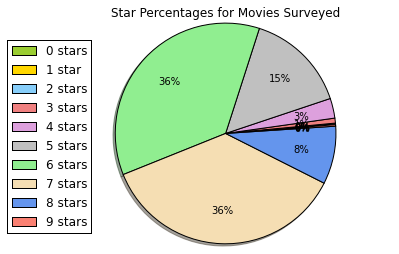

In [33]:
# making a chart for imdb star_ratings for general movies surveyed

categories = [0,1,2,3,4,5,6,7,8,9]
criterion_ps = []
for category in categories:
    criterion_ps.append(len(df[df.star_rating == category])/float(len(df)))

cats = ["0 stars", "1 star", "2 stars", "3 stars", "4 stars", "5 stars", "6 stars", "7 stars", "8 stars", "9 stars"]
plt.pie(criterion_ps, explode=None,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum','silver','lightgreen','wheat','cornflowerblue', 'salmon'),
    autopct='%1.0f%%', pctdistance=0.7, shadow=True,
    labeldistance=2.5, startangle=5, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.legend(cats, loc=(-0.15,0.05))
plt.axis('equal')
plt.title('Star Percentages for Movies Surveyed')